# Importing Libraries

In [4]:
import math
import numpy as np

from skimage.io import imread, imshow, imsave
from skimage.color import rgba2rgb, rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt

# Reading the image

In [ ]:
img = imread('B.png')
plt.axis("off")
plt.imshow(img)
print(img.shape)

# Resizing image

In [ ]:
resized_img = resize(img, (128 * 8, 64 * 8))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

NameError: name 'resize' is not defined

# Creating and visualizing HOG Features

C:\Users\Titan\AppData\Local\Temp\ipykernel_6364\2654020046.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


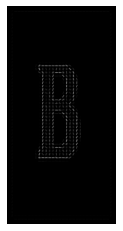

In [38]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [41]:
print(len(fd), list(fd))

18432 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Lossy conversion from float64 to uint8. Range [5.427166493987556e-10, 1.4142135623730947]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 179.99999999997723]. Convert image to uint8 prior to saving to suppress this warning.


Number of HOG features = 3780
[0.1230299448, 0.1226856128, 0.088553313, 0.0111219294, 0.0381607806, 0.1137958367, 0.037250628, 0.1192517624, 0.2168779185, 0.1353037376, 0.1349250541, 0.206849349, 0.0975974116, 0.3348693637, 0.0879930451, 0.1607098197, 0.029005611, 0.0527512249, 0.1223632448, 0.1220207787, 0.1378629435, 0.0775642811, 0.2661330975, 0.1644775138, 0.2097703778, 0.0421371988, 0.0766330643, 0.1547616074, 0.1543284659, 0.2801928291, 0.0388819712, 0.1334090807, 0.0827261723, 0.3268439086, 0.1048211133, 0.1906335337, 0.124838076, 0.1244886835, 0.190849678, 0.0900483113, 0.3089674227, 0.0811868367, 0.1482790132, 0.0267620447, 0.0486709498, 0.1797215479, 0.1792185494, 0.1115306284, 0.0234509281, 0.0804631726, 0.0454977068, 0.1876420667, 0.139513723, 0.2537274522, 0.1427908914, 0.1423912532, 0.2585200847, 0.0358744744, 0.1230899697, 0.0763273534, 0.3015627316, 0.0967132641, 0.1758881461, 0.17380359, 0.1733171545, 0.1359203694, 0.0731490409, 0.2509838365, 0.0846621643, 0.2069493558

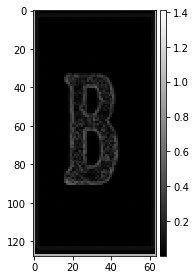

In [9]:
def hog(img, nbins=9):
    block_size = 8
    m_img = img.copy()
    angles = np.zeros(img.shape)
    step = 180 / nbins
    hist = np.zeros((img.shape[0] // block_size, img.shape[1] // block_size, nbins))
    # print(hist.shape)
    for row in range(0, img.shape[0] - 1):
        for col in range(0, img.shape[1] - 1):
            if col == 0:
                gx = img[row, col + 1]
            elif col + 1 == img.shape[1]:
                gx = - img[row, col - 1]
            else:
                gx = img[row, col + 1] - img[row, col - 1]
            if row == 0:
                gy = - img[row + 1, col]
            elif row + 1 == img.shape[0]:
                gy = img[row - 1, col]
            else:
                gy = img[row - 1, col] - img[row + 1, col]
            m_img[row, col] = math.sqrt(gx ** 2 + gy ** 2)
            angles[row, col] = (math.atan2(gy, gx) % math.pi) * 180 / math.pi
    # m_img = np.hypot(np.gradient(img)[0], np.gradient(img)[1])
    hist_row = 0
    imshow(m_img, cmap='gray')
    imsave('mag.jpg', m_img)
    imsave('angles.jpg', angles)
    for row_index in range(0, img.shape[0], block_size):
        hist_col = 0
        for col_index in range(0, img.shape[1], block_size):
            for window_row_index in range(block_size):
                for window_col_index in range(block_size):
                    angle = angles[window_row_index, window_col_index]
                    magnitude = m_img[row_index + window_row_index, col_index + window_col_index]
                    hist_vector_index = int(angle / step - 0.5) % nbins
                    # distance_from_angle_percentage = (angle - hist_vector_index * step) / step
                    cj1 =  step * (hist_vector_index+1+0.5)
                    cj = step * (hist_vector_index+0.5)
                    distance_from_angle_percentage = (cj1 - angle)/step
                    hist[hist_row, hist_col, hist_vector_index] = distance_from_angle_percentage * magnitude
                    distance_from_angle_percentage = (angle - cj)/step
                    hist[hist_row, hist_col, (hist_vector_index + 1) % 9] = distance_from_angle_percentage * magnitude
            hist_col += 1
        hist_row += 1
    # final_hist = np.zeros((img.shape[0] // block_size, img.shape[1] // block_size, (16 // block_size) ** 2 * nbins))
    final_hist = []
    # final_hist_2 = []
    final_hist_row_index = 0
    # counter = 0
    for row_index in range(0, hist.shape[0]-1):
        final_hist_col_index = 0
        for col_index in range(0, hist.shape[1]-1):
            new_vector = np.array([list(hist[row_index, col_index]) + list(hist[row_index, col_index + 1]) +
                                   list(hist[row_index + 1, col_index]) + list(hist[row_index + 1, col_index + 1])])
            # counter += 1
            # final_hist[final_hist_row_index, final_hist_col_index] = new_vector / math.sqrt(
            #     np.sum(new_vector ** 2) + 10 ** -5)
            new_vector_list = np.round((new_vector / math.sqrt(np.sum(new_vector ** 2) + 10 ** -5)), 10).tolist()[0]
            final_hist += new_vector_list
            final_hist_col_index += 1
        final_hist_row_index += 1
    # print(counter)
    return final_hist


# hog_img = (imread('grayB.jpg'))
hog_img = resize(rgb2gray(rgba2rgb(imread("B.png"))), (128, 64))

feature_vectors = hog(hog_img)
print(f'Number of HOG features = {len(feature_vectors)}')
print(feature_vectors)

In [7]:
imsave('grayB.jpg', rgb2gray(rgba2rgb(resized_img)))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [80]:
import skimage

fd = skimage.feature.hog(rgb2gray(rgba2rgb(resized_img)), orientations=9, pixels_per_cell=(8, 8),
                                    cells_per_block=(2, 2), block_norm='L2', multichannel=False)
print(len(fd))
# print(len(fd), list(fd))

70308


C:\Users\Titan\AppData\Local\Temp\ipykernel_6364\3013810420.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd = skimage.feature.hog(rgb2gray(rgba2rgb(resized_img)), orientations=9, pixels_per_cell=(8, 8),


In [9]:
nparr = np.array(feature_vectors) - np.array(fd)